<a href="https://colab.research.google.com/github/anazantoro/Model-PLP/blob/main/V3_Notebook_Predict_Personalized_Student_Learning_Category_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import sys
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.layers import Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical

### Dependencies Version

In [2]:
print("Python Version:", sys.version)
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Scikit-learn Version:", sklearn.__version__)
print("TensorFlow Version:", tf.__version__)

Python Version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
NumPy Version: 2.0.2
Pandas Version: 2.2.2
Scikit-learn Version: 1.6.1
TensorFlow Version: 2.18.0


# Load Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/praktisi-PLP-feature/Model-PLP/refs/heads/main/Dataset/SS_Kuesioner%20Keminatan%20Mahasiswa%20Sistem%20Informasi%20%20(Responses)%20-%20Labelled%20-%20Pre_Processed%20-%20Floated.csv")

# Understanding

In [4]:
data.head()

,UI/UX,Programming,Operational,Data Science,Cybersecurity,Quality Assurance,Computer Network,Label
0,0.56,0.58,0.32,0.36,0.44,0.64,0.70,Computer Network
1,0.56,0.50,0.48,0.46,0.58,0.76,0.44,Quality Assurance
2,0.44,0.46,0.72,0.60,0.40,0.50,0.46,Operational
3,0.54,0.58,0.62,0.50,0.34,0.48,0.46,Operational
4,0.40,0.68,0.52,0.16,0.54,0.36,0.74,Computer Network


In [5]:
data.describe()

,UI/UX,Programming,Operational,Data Science,Cybersecurity,Quality Assurance,Computer Network
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,0.505150,0.514431,0.508862,0.518144,0.518862,0.512096,0.501377
std,0.143478,0.152949,0.155153,0.150036,0.147825,0.149143,0.143986
min,0.120000,0.140000,0.100000,0.160000,0.160000,0.160000,0.120000
25%,0.420000,0.405000,0.420000,0.420000,0.420000,0.400000,0.400000
50%,0.490000,0.500000,0.500000,0.500000,0.520000,0.500000,0.500000
75%,0.600000,0.600000,0.600000,0.620000,0.600000,0.620000,0.600000
max,0.940000,1.000000,1.000000,0.980000,0.980000,0.880000,0.960000


In [6]:
pd.DataFrame(data.isna().sum() / len(data) * 100, columns=['Null Ratio %'])

,Null Ratio %
UI/UX,0.0
Programming,0.0
Operational,0.0
Data Science,0.0
Cybersecurity,0.0
Quality Assurance,0.0
Computer Network,0.0
Label,0.0


In [7]:
data[data.duplicated()]

,UI/UX,Programming,Operational,Data Science,Cybersecurity,Quality Assurance,Computer Network,Label


# Pre-processing

In [8]:
X = data.iloc[:, :-1].values
y = np.argmax(X, axis=1)

In [9]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_reshaped = X_train_smote.reshape((X_train_smote.shape[0], 1, X_train_smote.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train_sparse = y_train_smote
y_test_sparse = y_test

In [10]:
X_train_reshaped.shape

(273, 1, 7)

# Modelling

In [54]:
model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(1, 7), go_backwards=True),
    Dropout(0.5),
    Dense(32, activation='tanh'),
    Dense(7, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_reshaped,
    y_train_sparse,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test_sparse)
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 304ms/step - accuracy: 0.1103 - loss: 1.9961 - val_accuracy: 0.0495 - val_loss: 1.9513
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0921 - loss: 1.9850 - val_accuracy: 0.1188 - val_loss: 1.9140
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1684 - loss: 1.9653 - val_accuracy: 0.3168 - val_loss: 1.8826
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2019 - loss: 1.9337 - val_accuracy: 0.3465 - val_loss: 1.8564
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2699 - loss: 1.8680 - val_accuracy: 0.4356 - val_loss: 1.8263
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2249 - loss: 1.8718 - val_accuracy: 0.4653 - val_loss: 1.8014
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3367 - loss: 1.8164 - val_accuracy: 0.5149 - val_loss: 1.7745
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3243 - loss: 1.8069 - val_accuracy: 0.5941 - val_loss: 1.7428
Epoch 

# Training

# Evaluation

In [55]:
categories = ['UI/UX', 'Programming', 'Operational', 'Data Science', 'Cybersecurity',
              'Quality Assurance', 'Computer Network']

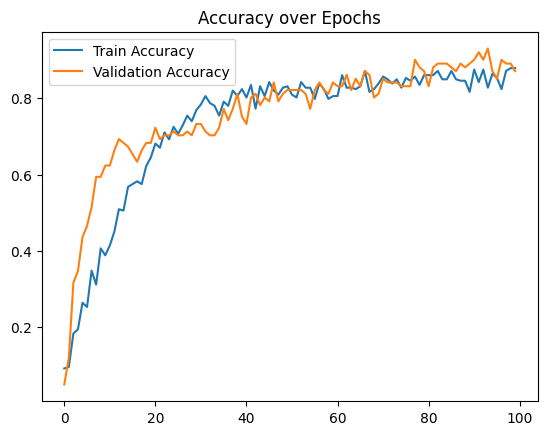

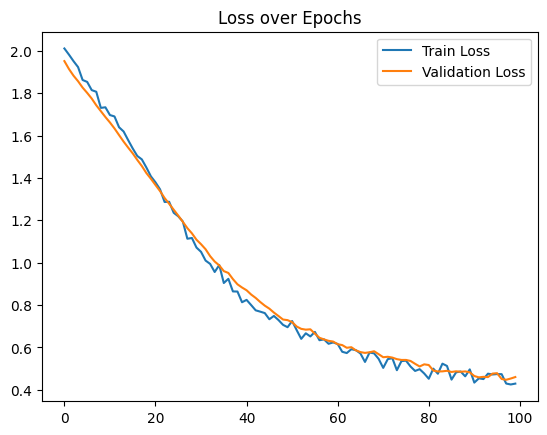

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


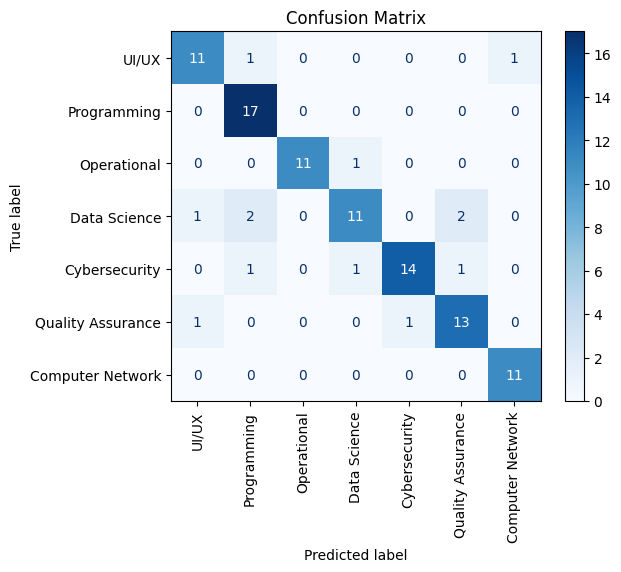

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

In [58]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 64)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,759 (81.09 KB)

 Trainable params: 6,919 (27.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,840 (54.07 KB)

# Testing Model

In [59]:
def predict_and_show(new_data, model, categories, top_k=3):
    new_data = np.expand_dims(new_data, axis=1)
    new_data_prediction = model.predict(new_data)[0]

    threshold = np.mean(new_data_prediction)
    print(f"\nDynamic Threshold (from prediction mean): {threshold:.4f}")

    above_threshold = [(i, prob) for i, prob in enumerate(new_data_prediction) if prob > threshold]

    if above_threshold:
        print("\nPredictions above threshold:")
        above_threshold.sort(key=lambda x: x[1], reverse=True)
        for idx, prob in above_threshold[:top_k]:
            print(f"{categories[idx]}: {prob:.4f}")
    else:
        top_index = new_data_prediction.argmax()
        print("\nNo prediction above threshold. Fallback to top-1:")
        print(f"{categories[top_index]}: {new_data_prediction[top_index]:.4f}")

    plt.figure(figsize=(8, 5))
    bars = plt.bar(categories, new_data_prediction, color='skyblue')
    for i, bar in enumerate(bars):
        if new_data_prediction[i] > threshold:
            bar.set_color('green')
        elif new_data_prediction[i] == new_data_prediction.max() and not above_threshold:
            bar.set_color('orange')
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.2f}')
    plt.title("Prediction Probabilities")
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

def manual_input():
    scores = []
    print("Masukkan skor untuk masing-masing kategori (0.0 - 1.0):")
    for category in categories:
        while True:
            try:
                value = float(input(f"{category}: "))
                if 0.0 <= value <= 1.0:
                    scores.append(value)
                    break
                else:
                    print("Masukkan angka antara 0.0 sampai 1.0!")
            except ValueError:
                print("Masukkan angka yang valid!")
    return np.array([scores])

Masukkan skor untuk masing-masing kategori (0.0 - 1.0):
UI/UX: 0,3
Masukkan angka yang valid!
UI/UX: 0.3
Programming: 0.6
Operational: 0.8
Data Science: 0.5
Cybersecurity: 0.4
Quality Assurance: 0.9
Computer Network: 0.2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step

Dynamic Threshold (from prediction mean): 0.4716

Predictions above threshold:
Quality Assurance: 0.9907
Operational: 0.9846
Programming: 0.8408


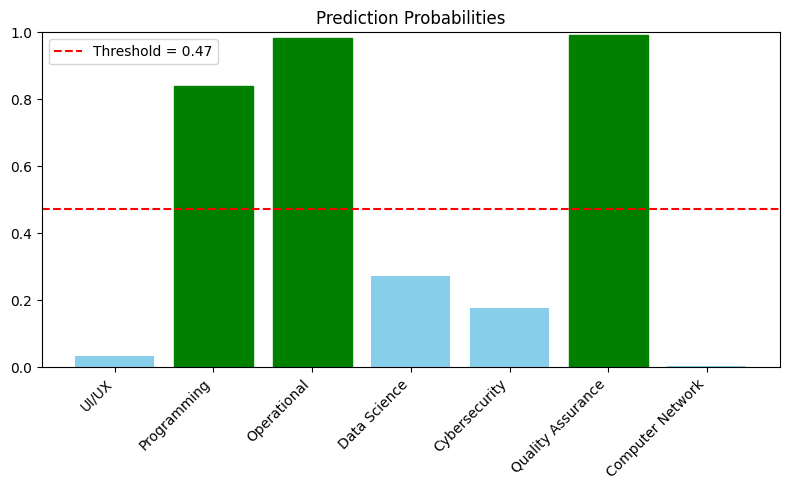

In [60]:
def predict_and_show_manual_input(model):
    user_input = manual_input()
    predict_and_show(user_input, model, categories)

predict_and_show_manual_input(model)

# Save Model

In [61]:
model.save("model.h5")

In [62]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)